<a href="https://colab.research.google.com/github/manuelpope/MscIA/blob/main/IAA_PRAC_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M1.204 - Inteligencia Artificial Avanzada

**Nombre y apellidos:** MANUEL ANDRES TOBON BAYONA

# SEGMENTACIÓN DE IMÁGENES MEDIANTE REDES NEURONAL CONVOLUCIONALES

## INTRODUCCIÓN

Las redes neuronales han demostrado, en los últimos años, su capacidad para resolver problemas que eran muy complejos o, incluso, imposibles de resolver mediante métodos tradicionales.

Entre los problemas en los que las redes neuronales destacan se encuentra el de la visión por computador y, dentro de esta rama, la segmentación de imágenes. La segmentación de imágenes consiste en delimitar, dentro de una imagen, ciertos objetos de interés. En este ámbito, las redes neuronales convolucionales o Convolutional Neural Netorks (CNN) son las que mejores resultados ofrecen.

En esta práctica exploraremos el uso de CNN para la segmentación de imágenes, examinando varias arquitecturas basadas en la estructura codificador-decodificador (encoder-decoder).

## COMPETENCIAS

En este enunciado se trabajan las siguientes competencias generales de máster:

* Capacidad para proyectar, calcular y diseñar productos, procesos e instalaciones en todos los ámbitos de la ingeniería informática.
* Capacidad para el modelado matemático, cálculo y simulación en centros tecnológicos y de ingeniería de empresa, particularmente en tareas de investigación, desarrollo e innovación en todos los ámbitos relacionados con la ingeniería informática.
* Capacidad para aplicar los conocimientos adquiridos y solucionar problemas en entornos nuevos o poco conocidos dentro de contextos más amplios y multidisciplinares, siendo capaces de integrar estos conocimientos.
* Poseer habilidades para el aprendizaje continuo, autodirigido y autónomo. 
* Capacidad para modelar, diseñar, definir la arquitectura, implantar, gestionar, operar, administrar y mantener aplicaciones, redes, sistemas, servicios y contenidos informáticos.

Las competencias específicas de esta asignatura que se trabajan en esta prueba son:

* Entender qué es el aprendizaje automático en el contexto de la inteligencia artificial
* Distinguir entre los diferentes tipos y métodos de aprendizaje
* Aplicar las técnicas estudiadas a un caso real

## DESCRIPCIÓN DE LOS DATOS

Una de las características más destacables de las redes neuronales es su necesidad de grandes cantidades de datos para ser entrenadas. Por este motivo, en esta práctica trabajaréis con el conjunto de datos Oxford III Pet Dataset, el cual contiene más de 7000 imágenes debidamente etiquetadas de perros y gatos. El conjunto de datos original se encuentra en el siguiente enlace:

https://www.robots.ox.ac.uk/~vgg/data/pets/ 

Desgraciadamente, este conjunto de datos presenta algunas imperfecciones y una gran diversidad de resolucione, cosa que dificulta trabajar directamente con ellas. Por este motivo os hemos preparado una versión adaptada del mencionado dataset que debéis bajaros del siguiente enlace:

https://drive.google.com/file/d/1oAnenY7fHBnJEo2NxJ6tOW_ADSfM6Fwk/view?usp=sharing

Por lo tanto, no debéis trabajar con el Oxford III Pet Dataset original sino con la versión adaptada que se os ha suministrado a través del enlace anterior.

Esta versión adaptada se proporciona dentro de una carpeta denominada DATA dentro de la cual encontraréis dos subcarpetas: IMG y GT.

Dentro de la carpeta IMG encontraréis 7364 imágenes de perros y gatos en formato PNG. Todas ellas entán guardadas en formato RGB a una resolución de 64x64 píxeles. Estas imágenes son los datos que queremos que nuestra CNN aprenda a segmentar, separando los animales del fondo de la imagen.

Dentro de la carpeta GT encotraréis también 7364 imágenes en formato PNG. Las imágenes de la carpeta GT tienen los mismos nombres de archivo que los de la carpeta IMG y, por lo tanto, existe una relación uno a uno entre las imágenes de las dos carpetas. En particular, diremos que cada imagen de la carpeta IMG tiene su ground truth en la carpeta GT.

Cada píxel de una imagen de GT (ground truth) puede tomar tres valores: 0 (perro o gato), 1 (fondo) o 2 (indefinido). Si el píxel (i,j) vale 0 entonces el píxel (i,j) de la imagen (IMG)  correspondiente forma parte de un animal (sea un perro o un gato). Si el píxel (i,j) vale 1 entonces el píxel (i,j) de la imagen correspondiente forma parte del fondo. Finalmente, si el pícel (i,j) del ground truth vale 2 entonces el píxel correspondiente de la imagen es de difícil clasificación. Normalmente los valores 2 se sitúan en los contornos entre el animal y el fondo, donde es difícil determinar donde empieza una categoría y termina otra.

Notad que las imágenes de la carpeta GT tienen sus píxeles con valores 0, 1 y 2 y están guardadas como imágenes en escala de grises. Por este motivo, no se visualizarán claramente con programas estándard de visualización de imágenes. No obstante, las herramientas de visualización de imágenes de (entre otros) matplotlib.pyplot determinan correctamente el formato y realizan una visualización clara de las mismas.

## DESCRIPCIÓN DEL ENTORNO DE TRABAJO

La entrega de esta práctica se realizará en un archivo ipynb. Podéis trabajar con estos archivos en local utilizando la plataforma Jupyter (Jupyter notebook o Jupyter lab). En este caso deberéis instalaros Keras con el back-end Tensorflow, además de bibliotecas como scikit-learn o scikit-image entre otras.

Con el fin de evitaros problemas de dependencias de bibliotecas, de versiones o de conflictos entre distintas instalaciones en vuestro ordenador, os recomendamos trabajar con la plataforma Google Colab:

https://colab.research.google.com/notebooks/welcome.ipynb

Una vez accedáis a este enlace deberéis identificaros con vuestro nombre de usuario y contraseña Google. Podéis utilizar (y, de hecho, os lo recomendamos) el usuario y la contraseña de Google propios de la UOC.

Hecho esto podréis trabajar con la plantilla ipynb que os proporcionamos para resolver la práctica desde Colab, donde ya encontraréis Keras, Tensorflow, sklearn y otras bibliotecas preinstaladas. Si necesitáis instalar alguna biblioteca adicional, podéis instalarla con el comendo:

```
!pip install biblioteca-a-instalar
```

Antes de empezar con la práctica os recomendamos que os familiaricéis con Google Colab. És muy importante que tengáis en cuenta que todos los archivos generados en una sesión Google Colab se pierden al cerrar la sesión, de manera que deberéis decidir como hacerlos persistentes si es necesario: podéis bajarlos a vuestro disco duro al acabar la sesión y subirlos de nuevo al empezar o, también, podéis enlazar vuestro Google Drive a Colab para poder acceder a él como una unidad más.

Es imporante que tengáis en cuenta que los accesos a Google Drive desde Colab tienen mucha latencia. Por lo tanto, no es recomendable que vuestros programas accedan directamente a Google Drive. Es mejor copiar los datos de Drive a Colab al empezar una sesión y de Colab a Drive al terminar.

Encontraréis información sobre todos estos aspectos en el siguiente enlace:

https://colab.research.google.com/notebooks/io.ipynb

En cualquier caso, la forma de gestionar los archivos es decisión vuestra y forma parte del trabajo propio de la práctica: los profesores no os proporcionaremos una solución cerrada a la gestión de archivos.

Es importante destacar también que tanto en esta aula como en el aula de Laboratotio asociada si la hay se dará soporta al uso de Colab, pero al uso de otros entornos con problemáticas diversas derivadas de la instalación de bibliotecas en local.

Cabe destacar también que una herramienta que os puede resultar útil para entender el funcionamiento de la red neuronal a medida que la desarrolléis y la entrenéis es TensorBoard. No hay ninguna pregunta específica al respecto, pero podéis utilizarla para trabajar más cómodamente. Aún así, tened en cuenta que el uso de TensorBoard, si decidís utilizarlo, no os exime de realizar cada uno de los apartados siguiento exactamente las pautas indicadas en el enunciado. Podéis encontrar información sobre TensorBoard aquí:

https://www.tensorflow.org/tensorboard

## FORMATO DE LA ENTREGA

La práctica se entregará única y exclusivamente en formato ipynb. El archivo resultante contendrá vuestro código, el resultado de la ejecución de vuestro código y las respuestas a las preguntas formuladas.

Por este motivo se os proporciona esta plantilla que estáis leyendo ahora y que debéis completar. El ipynb que entreguéis será, por tanto, esta plantilla completada y deberá contener el código solicitado (de forma que el profesor lo pueda ejecutar) y también el resultado de vuestra ejecución, además de las respuestas y explicaciones necesarias. Para responder con explicaciones textuales, utilizad celdas de texto.

La plantilla contiene espacio para que pongáis vuestro código y todas las respuestas. Es imprescindible que utilicéis las celdas ya proporcionadas para introducir vuestras respuestas si añadir ninguna más.

### EJERCICIO 1: Comprender el conjunto de datos

**1-a) (0.25 PUNTOS) Abrid la imagen miniature_pinscher_144 y el ground truth correspondiente. Visualizad ambos uno al lado del otro. Utilizad la biblioteca skimage para leer los archivos de imagen como arrays NumPy. Utilizad la biblioteca matplotlib.pyplot para visualizar las imágenes (tanto la de datos como el grouns truth)**

In [94]:
# Poned vuestro código aquí y ejecutadlo.

In [95]:
!git clone https://github.com/manuelpope/dataforpracticemsc.git
#AGREGUE UN REPO EN MI GITHUB PARA ACCEDER A LOS DATOS Y
#MIS MODELOS ENTRENADOS SIN TENER QUE VOLVER A CARGARLOS DESDE
#MI MAQUINA LOCAL.

fatal: destination path 'dataforpracticemsc' already exists and is not an empty directory.


In [96]:
!pip install pillow


In [97]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import numpy as np
from skimage import io

flag_re_trainKerasModel=False
#------ Poner este flag en True si se quiere volver a correr el entrenamiento -------------

listImages,listGround=[],[]
for image_path in glob.glob("/content/dataforpracticemsc/DATA/IMG/*.png"):
# Read Images
  img=io.imread(image_path)
  #img = mpimg.imread(image_path)
  if "miniature_pinscher_144" in image_path:
    print(len(listImages),image_path)     
  listImages.append(img)
# Output Images
for image_path in glob.glob("/content/dataforpracticemsc/DATA/GT/*.png"):
# Read Images
  img=io.imread(image_path)
  if "miniature_pinscher_144" in image_path:
    print(len(listGround))
  listGround.append(img)
# Output Images


print(len(listImages),len(listGround))


1139 /content/dataforpracticemsc/DATA/IMG/miniature_pinscher_144.png
1139
7364 7364


In [98]:
XImages= np.array(listImages)
XGround= np.array(listGround)


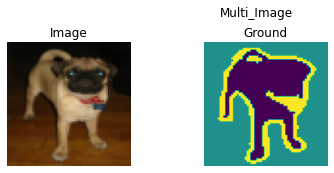

In [99]:
plt.figure(figsize=(10,5)) # Establecer tamaño de ventana
plt.suptitle('Multi_Image') # Nombre de la imagen
plt.subplot(2,3,1), plt.title('Image')
plt.imshow(XImages[4300]), plt.axis('off')
plt.subplot(2,3,2), plt.title('Ground')
plt.imshow(XGround[4300]), plt.axis('off')
plt.show()

In [100]:
XGround[1][0]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

**1-b) (0.5 PUNTOS) Con el fin de entender mejor qué representa el ground truth y también para aprender a manipular imágenes, cread la función get_pet (fileName). El parámetro de entrada de esta función debe ser un nombre de archivo (por ejemplo, miniature_pinscher_144.png). La función debe devolver la imagen correspondiente al archivo indicado pero con los píxeles de fondo en rojo. Por lo tanto, la función debe acceder a la imagen ya su ground truth y devolver la imagen modificada de forma que los píxeles que el ground truth indica que son de fondo deben estar en rojo mientras que los que no son de fondo conservarán los valores de la imagen original. Notad que esta función no debe modificar ninguna imagen en disco. Es decir, el dataset que os proporcionamos debe permanecer inalterado.**

**Ejecutad esta función sobre miniature_pinscher_144.png y sobre otra imagen de su elección. Mostrad por pantalla las dos imágenes resultantes.**

In [101]:
# Poned vuestro código aquí y ejecutadlo.

In [102]:
def findAndDisplay(nameImage:str):

  img=io.imread("/content/dataforpracticemsc/DATA/IMG/"+nameImage+".png")
  gnd=io.imread("/content/dataforpracticemsc/DATA/GT/"+nameImage+".png")
  img[np.all(img == (0,255,0), axis=-1)] = (0,0,255)


  plt.figure(figsize=(10,5)) # Establecer tamaño de ventana
  plt.suptitle('Multi_Image') # Nombre de la imagen
  plt.subplot(2,3,1), plt.title('Image')
  plt.imshow(img), plt.axis('off')
  plt.subplot(2,3,2), plt.title('Ground')
  plt.imshow(gnd), plt.axis('off')
  plt.show()


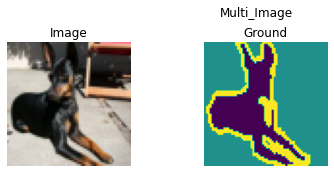

In [103]:
findAndDisplay("miniature_pinscher_144")

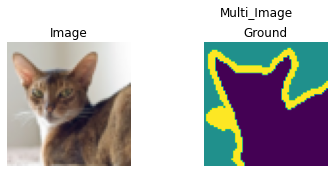

In [104]:
findAndDisplay("Abyssinian_55")

**1-c) (0.5 PUNTOS) Con el fin de entrenar redes neuronales es deseable disponer de tres conjuntos de datos: el conjunto de entrenamiento (con el que se entrena la red), el conjunto de validación (con el que evalúa el entrenamiento de manera que se pueda cambiar la red y reentrenarla si es preciso) y el conjunto de prueba o test (con el que se hace la evaluación final para medir la calidad de la red). Estos tres conjuntos deben ser disjuntos y no deben estar sesgados hacia ninguna clase o distribución de datos arbitraria.**

**En este apartado debéis crear la función split_datafiles encargada de generar estos tres conjuntos a partir del dataset de partida. En particular, esta función debe devolver estas tres listas de nombres de archivos (sin la ruta, sólo los nombres de archivo):**

* **trainSet: Debe contener el 70% de los nombres de archivo existentes en el dataset.**
* **testSet: Debe contener el 20% de los nombres de archivos existentes en el dataset.**
* **valSet: Debe contener el 10% de los nombres de archivos existentes en el dataset.**

**Estas tres listas deben ser disjuntas (no puede haber ningún nombre repetido ni dentro de una lista ni entre ellas), deben estar aleatorizadas (no deben tener ningún orden concreto) y entre las tres deben contener todos los nombres de archivo.**

**Una vez implementada, ejecutad la función y generad así tres variables: trainSet, testSet y valSet. Nótese que las variables son listas que contienen nombres de archivo. No deben contener las imágenes, sólo el nombre del archivo.**

**Para facilitar la tarea, os recomendamos que utilicéis la biblioteca «os» que permite, por ejemplo, listar los contenidos de un directorio (os.listdir), determinar si un elemento es un archivo o no (os.path.isfile) y concatenar rutas y nombres de archivo de manera compatible con todos los sistemas operativos (os.path.join). También recomendamos el uso de la biblioteca random para aleatorizar las listas. Más concretamente, recomendamos, la función random.shuffle.**

In [105]:
# Poned vuestro código aquí y ejecutadlo.

In [106]:
from sklearn.model_selection import train_test_split
import random
def  split_datafiles():
  listImages=[]

  for image_path in glob.glob("/content/dataforpracticemsc/DATA/IMG/*.png"):
# Read Images
    img=io.imread(image_path)
  #img = mpimg.imread(image_path)
    dict_i={
        'value': img,
        'name':image_path.replace('/content/dataforpracticemsc/DATA/IMG/','')
        }
    listImages.append(dict_i)

  listGrounds=[]
  for image_path in glob.glob("/content/dataforpracticemsc/DATA/GT/*.png"):
# Read Images
    img=io.imread(image_path)
  #img = mpimg.imread(image_path)
    dict_i={
        'value': img,
        'name':image_path.replace('/content/dataforpracticemsc/DATA/GT/','')
        }
  listGrounds.append(dict_i)
  random.shuffle(listGrounds)
  random.shuffle(listImages)

  Ntest_val=len(listImages) // 10
  Ntrain= len(listImages)- Ntest_val*3
  NvalAcc=Ntrain+Ntest_val
  X_train, y_train = listImages[:Ntrain] ,listGrounds[:Ntrain]
  X_val, y_val = listImages[Ntrain:NvalAcc],listGrounds[Ntrain:NvalAcc]
  X_test, y_test = listImages[NvalAcc:],listGrounds[NvalAcc:]

  return X_train, y_train, X_test,y_test,X_val,y_val



In [107]:
X_train, y_train, X_test,y_test,X_val,y_val = split_datafiles()

In [108]:
trainSet=[elem['name'] for elem in X_train]
testSet=[elem['name'] for elem in X_test]
valSet=[elem['name'] for elem in X_val]

### EJERCICIO 2: Generadores de datos

Keras proporciona un formato cómodo para suministrar datos a una red neuronal tanto para su entrenamiento como para su validación y testeo. Son los llamados Data Generators. Un objeto Data Generator debe heredar de la clase Sequence y debe definir, como mínimo, dos métodos:

* \_\_len\_\_(): Este método devuelve el número de lotes (batches) distintos que es capaz de proporcionar el Data Generator.
* \_\_getitem\_\_(i): Este método proporciona las imágenes y el ground truth del i-ésimo lote (batch)

Aunque no es obligatorio, es recomendable que un Data Generator también proporcione un método on_epoch_end el cual se ejecutá automáticamente después de cada epoch en la fase de entrenamiento.

**2-a) (0.5 PUNTOS) En este apartado debéis completar la clase DataGenerator que se proporciona en la siguiente celda de la plantilla ipynb. Como veréis, sólo falta completar el método \_load\_image\_pair\_ que se utiliza internamente en \_\_getitem\_\_. Podéis deducir qué debe hacer \_load\_image\_pair\_ a partir de los comentarios dentro del código y del resto de métodos que ya se os proporcionan programados.**

**Una vez que hayáis completado la clase, debéis ejecutar las siguientes líneas para generar los tres Data Generators que necesitaremos: el de entrenamiento, el de testeo y el de validación, a partir de la salida de la función split_datafiles que ya ha desarrollado.**

```
trainGenerator=DataGenerator(trainSet,True)
testGenerator=DataGenerator(testSet,False)
valGenerator=DataGenerator(valSet,False)
```

**Notad que la ejecución de estas líneas puede ayudaros a detectar errores en el código de la clase DataGenerator.**

**Nota también que estas líneas ya están incluidas al final de la siguiente celda. No es necesario que las volváis a escribir.**

In [109]:
# Completad el método _load_image_pair_ donde se indica.
# Tras hacerlo, ejecutad esta celda.
from tensorflow.keras.utils import Sequence
from skimage.io import imread
from skimage.util import img_as_float
from tensorflow.keras.utils import to_categorical
import numpy as np
import random
import os

class DataGenerator(Sequence):
    # Constructor. Input parameters are:
    # * doRandomize : If True, the provided file names are shuffled after each training epoch. Thus, it
    #                 is advisable to set it to True for the training dataset and to False for the validation
    #                 and test datasets (since in these cases it has no effect).
    # * fileNames   : List of sample file names, as provided by split_datafiles. This allows to build
    #                 a train data generator, a test data generator or a validation data generator just
    #                 by using the corresponding split_datafiles output.
    # * imgPath     : Path to the sample images (i.e. DATA/IMG)
    # * gtPath      : Path to the ground truth (i.e. DATA/GT)
    # * batchSize   : Numbre of sample images and ground truth items in each batch
    def __init__(self,fileNames,doRandomize=False,imgPath='DATA/IMG',gtPath='DATA/GT',batchSize=10):
        # Store parameters
        self.imgPath=imgPath
        self.gtPath=gtPath
        self.fileNames=fileNames
        self.batchSize=batchSize
        self.doRandomize=doRandomize
        # Get number of files (to avoid computing them later)
        self.numImages=len(self.fileNames)
        # Shuffle them if required
        self.on_epoch_end()

    # Shuffle data at the end of every epoch if required
    def on_epoch_end(self):
        if self.doRandomize:
            random.shuffle(self.fileNames)
    
    # This is a helper method used by __getitem__
    # Loads the sample and the ground truth corresponding to file name self.fileNames[imageIndex]
    # Each channel in the sample image must be converted to the interval [0,1]. See img_as_float
    # in skimage.util to achieve this task. The [0,1] interval is usually more convenient for
    # Neural Network operation.
    # The ground truth must be converted to categorical (one-hot encoding). Use to_categorical
    # from keras.utils to achieve this task. The categorical format is more convenient when
    # classes have no specific order.
    def _load_image_pair_(self,imageIndex):


        # Place your code here
        
# ------ PLACE YOUR CODE BETWEEN THIS LINE... -------------------------------------------------
        imageIndex=self.fileNames[imageIndex]
        theImage=io.imread("/content/dataforpracticemsc/DATA/IMG/"+imageIndex)
        norm = np.linalg.norm(theImage)
        theImage = theImage/255
        gtImage=io.imread("/content/dataforpracticemsc/DATA/GT/"+imageIndex)
        gtImage = to_categorical(gtImage)



        
# ------ ... AND THIS LINE --------------------------------------------------------------------

        # The method returns the modified sample image (within the interval [0,1]) (theImage)
        # and the categorical version of the ground truth (gtImage)
        return np.array(theImage),np.array(gtImage)
            
    # Returns the number ot batches
    def __len__(self):
        return int(np.ceil(float(self.numImages)/float(self.batchSize)))

    # Provides the "theIndex-th" batch
    # Batch format:
    # - X : The data. Numpy array of shape (bs,nr,nc,3)
    # - y : The ground truth. Numpy array of shape (bs,nr,nc,3)
    # Where nb=batch size, nr=num rows, nc=num cols (in this case, nr=nc=64)
    # Since "y" is provided in categorical format the last dimension (3) is
    # the number of classes.
    def __getitem__(self,theIndex):
        X=[]
        y=[]
        bStart=max(theIndex*self.batchSize,0)
        bEnd=min((theIndex+1)*self.batchSize,self.numImages)

        for i in range(bStart,bEnd):
            [curImage,curGT]=self._load_image_pair_(i)
            X.append(curImage)
            y.append(curGT)
        return np.array(X),np.array(y)


    
trainGenerator=DataGenerator(trainSet,True)
testGenerator=DataGenerator(testSet,False)
valGenerator=DataGenerator(valSet,False)

**2-b) (0.5 PUNTOS) Una vez ejecutadas las líneas anteriores, podéis obtener -por ejemplo- el primer lote (batch) del conjunto de entrenamiento haciendo, simplemente:**
```
[X,y]=trainGenerator.__getitem__(0)
```

**En este apartado debéis programar la función plot\_batch(X, y) donde X e y son los proporcionados por la línea anterior. Esta función debe dibujar dos filas de imágenes. La primera fila debe mostrar las imágenes del lote y la segunda fila el ground truth correspondiente.**

In [110]:
# Introducid vuestro código en esta celda y ejecutadlo.

In [111]:
[X,y]=trainGenerator.__getitem__(6)

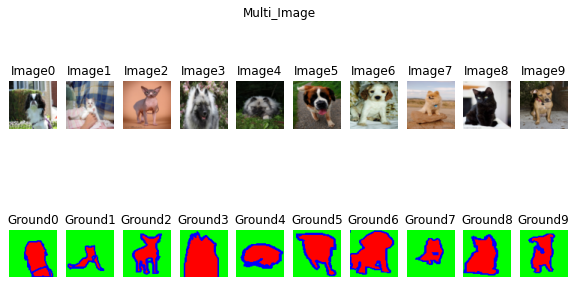

In [112]:
def plot_batch(X,y):
  plt.figure(figsize=(10,5)) # Establecer tamaño de ventana
  plt.suptitle('Multi_Image') # Nombre de la imagen
  for img in range(0,len(X)):

    plt.subplot(2,10,img+1), plt.title('Image'+str(img))
    plt.imshow(X[img]), plt.axis('off')
    plt.subplot(2,10,11+img), plt.title('Ground'+str(img))
    plt.imshow(y[img]), plt.axis('off')
  plt.show()
plot_batch(X,y)

### EJERCICIO 3: Creación de una CNN des de cero

Las arquitecturas de red neuronal utilizadas con mayor frecuencia para segmentar imágenes son las denominadas codificador-decodificador (encoder-decoder). A grandes rasgos, estas arquitecturas están formadas por:

* Un codificador, que parte de la imagen de entrada y la va transformando hasta una representación más pequeña a través de capas sucesivas (típicamente convoluciones y pooling).
* Un descodificador, que parte de la salida del codificador y la transforma hacia una representación del mismo tamaño que la imagen de partida. Típicamente se construye como una sucesión de convoluciones y poolings transpuestos o capas de upsampling.

La idea de fondo es que el codificador extrae la información relevante de los datos de partida y el descodificador muestra una representación alternativa de estos datos. En nuestro caso, la representación alternativa es la imagen segmentada en el mismo formato que el ground truth del cual disponemos.

Buscad información en la red sobre estas arquitecturas. Buscad también información en la documentación de keras sobre los modelos secuenciales (Sequential models) y las capas Conv2D, MaxPooling2D y UpSampling2D como mínimo.

En cuanto comprendáis las arquitecturas encoder-decoder y hayáis leido la documentación pertinente, resolved los siguientes apartados:

**3-a) (0.75 PUNTOS) Completad el código que se os suministra en la siguiente celda con el fin de que el modelo creado cumpla los siguientes requisitos:**

* **La dimensión de entrada (input_shape) debe ser (64,64,3), que es la dimensión de una imagen de nuestro dataset.**
* **La dimensión de salida debe ser (64,64,3). Notad que la salida se proporciona en formato categórico o One-Hot (si no sabéis por qué, revisar el Data Generator) y, por lo tanto, el "3" de la tercera dimensión no se debe al color (como lo era en la entrada) sino porque disponemos de 3 clases (mascota, fondo e indefinido). Notad también que la dimensión de salida no se especifica de forma explícita en ningún lugar de la red. Simplemente podéis consultar cuál es utilizando, por ejemplo, el método summary() del modelo y ajustar la red hasta llegar al (64,64,3) deseado.**
* **La función de activación de la última capa debe ser "softmax*.**
* **El número total de parámetros entrenables debe estar entre los 20000 y los 30000.**
* **El modelo definido debe responder a una arquitectura encoder-decoder, incluyento por lo tanto el codificador y el decodificador. Como referencia ya os proporcionamos las dos primeras capas del encoder (Conv2D i MaxPooling2D) y las dos últimas capas del decoder (UpSampling2D i Conv2D).**

**Además, el código que desarrolléis también debe compilar el modelo utilizando "adam" como optimizador, "categorical_crossentropy" como función de pérdida y, como mínimo, "categorical_accuracy" como métrica.**

**Una vez definido y compilado el modelo, imprimid su resumen mediante el método "summary()". Entre otros, el resumen os mostrará la cantidad de parámetros entrenables del modelo que, como se ha indicado, debe estar entre 20000 y 30000.**

In [113]:
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Dense,Flatten,Dropout

# Model creation and compilation is conveniently placed in a function so it is easy to
# re-create the model later.
def create_and_compile_model():
    theModel=models.Sequential([
        Conv2D(8, (3, 3), activation='relu', padding='same',input_shape=(64,64,3)),
        MaxPooling2D((2, 2), padding='same'),

# ------ PLACE YOUR CODE TO COMPLETE THE MODEL BETWEEN THIS LINE... ----------------------------
        Dense(1024,activation='relu'),
        Dropout(0.1),
        Dense(256,activation='relu'),
        Dropout(0.1),
        Dense(128,activation='relu'),
        Dropout(0.1),
        Dense(64,activation='relu'),
        Dropout(0.1),
        Dense(128,activation='relu'),
        Dropout(0.1),
        Dense(256,activation='relu'),



# ------ ... AND THIS LINE --------------------------------------------------------------------
    
        UpSampling2D((2, 2)),
        Conv2D(3, (3, 3), activation='softmax', padding='same')
    ])

# ------ PLACE YOUR CODE TO COMPILE THE MODEL BETWEEN THIS LINE... -----------------------------
    theModel.compile(loss="categorical_crossentropy",
                     optimizer="adam",
                     metrics=["categorical_accuracy"])


# ------ ... AND THIS LINE --------------------------------------------------------------------
    
    return theModel

# Now create and compile it
theModel=create_and_compile_model()

# Print the summary
theModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
dense_12 (Dense)             (None, 32, 32, 1024)      9216      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 1024)      0         
_________________________________________________________________
dense_13 (Dense)             (None, 32, 32, 256)       262400    
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 256)       0         
_________________________________________________________________
dense_14 (Dense)             (None, 32, 32, 128)      

**3-b) (0.5 PUNTOS) Entrenad durante 100 epoch el modelo anterior empleando trainGenerator para proporcionar los datos de entrenamiento y valGenerator para proporcionar los datos de validación.**

**El método de entrenamiento (fit) devuelve, entre otros, un campo llamado history. Guardadlo en la variable trainHistory.**

**A medida que la red se vaya entrenando veréis las medidas de calidad que hayáis indicado en "metrics" al compilar el modelo. Debéis conseguir que la precisión con el conjunto de validación (val_categorical_accuracy) llegue, como mínimo, al 70% (aunque fácilmente deberíais llegar y superar el 80%). Aunque es posible que a partir de un cierto epoch el val_categorical_accuracy comience a bajar (esto lo analizaréis los siguientes apartados) es indispensable que en su punto máximo sea superior al 70%. Si no lo es, deberéis modificar el modelo y reentrenarlo hasta que lo consigáis.**

**Notad que el entrenamiento puede tardar decenas de segundos por epoch. En Google Colaboratory podéis acelerar el entrenamiento cambiando el runtime a GPU.**

**Notad también que si por algún motivo debéis detener el entrenamiento, antes de volver a empezar debéis definir y compilar el modelo de nuevo o el nuevo entrenamiento podría no ser válido.**

**Finalmente, notad que en este apartado estamos juntando gran parte del trabajo hecho hasta ahora. Pueden aparecer errores que os obliguen a revisar y corregir apartados anteriores.**

In [114]:
# Introducid vuestro código en esta celda y ejecutadlo.

In [115]:
%tensorflow_version 2.x
import tensorflow
device_name = tensorflow.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [116]:
import tensorflow
from google.colab import files




if flag_re_trainKerasModel:
  trainHistory = theModel.fit(x=trainGenerator,validation_data=valGenerator,epochs=100)
  theModel.save('modeltry1.h5')
  files.download('modeltry1.h5')


**3-c) (0.25 PUNTOS) Cread las funciones save_trained_model(fileName,theModel,trainHistory) y [theModel,trainHistory]=load_trained_model(fileName) encargadas de guardar en disco y de leer de disco, respectivamente, el modelo entrenado y el trainHistory.**

**Respecto a guardar y cargar el modelo entrenado, buscad información en la documentación de Keras. Respecto a cómo guardar o leer de disco el trainHistory, os recomendamos las funciona dump y load del módulo «pickle», aunque hay otras opciones.**

**Una vez implementadas estas funciones, guardad vuestro modelo y trainHistory y recargadlos para comprobar que todo funciona correctamente.**

In [117]:
!pip install deepdish

In [118]:
# Introducid vuestro código en esta celda y ejecutadlo.
import pickle
import deepdish as dd
import copy




def save_trained_mode(fileName, theModel, trainHistory):
  theModel.save('model_trained'+fileName+'.h5')
  dictModel={'loss':trainHistory.history['loss'],
           'categorical_accuracy': trainHistory.history['categorical_accuracy'],
           'val_loss': trainHistory.history['val_loss'],
           'val_categorical_accuracy': trainHistory.history['val_categorical_accuracy']}
  a_file = open("dataHistory.bin", "wb")
  pickle.dump(dictModel, a_file)
  a_file.close()


def load_trained_model(fileName):
  new_model = tensorflow.keras.models.load_model(fileName)
  return new_model

model2= load_trained_model('/content/dataforpracticemsc/DATA/model_trainedmodel_1.h5')


In [119]:
model2.evaluate(testGenerator)


148/148 [==============================] - 4s 23ms/step - loss: 0.6487 - categorical_accuracy: 0.7165


[0.6487461924552917, 0.7164560556411743]

In [120]:
import os

scores = {} # scores is an empty dict already
pathDict='/content/dataforpracticemsc/DATA/dataHistory.bin'
if os.path.getsize(pathDict) > 0:      
    with open(pathDict, "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()

In [121]:
scores.keys() # CONTIENE LA INFO DE TRAINHISTORY DEL MODELO

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

**3-d) (1 PUNTO) El trainHistory que habéis guardado contiene los valores de la función de pérdida y de las métricas elegidas tanto por el conjunto de entrenamiento como para el conjunto de validación para cada epoch. Dibujad estos datos como creáis conveniente.**

**Se dice que la red sufre overfitting cuando en vez de aprender un modelo memoriza los datos de entrenamiento. El overfitting se puede detectar cuando la pérdida (loss) de los datos de entrenamiento continúa bajando pero la pérdida (loss) de los datos de validación estabiliza o sube.**

**¿A partir de cuántos epoch aparece overfitting al modelo que habéis entrenado?**

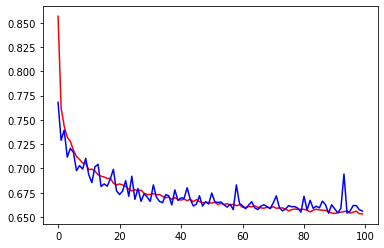

In [122]:
# Introducid vuestro código en esta celda y ejecutadlo.

import matplotlib.pyplot as plt



plt.plot(scores['loss'], 'r') # plotting t, a separately 
plt.plot(scores['val_loss'], 'b') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [123]:
#SE OBSERVA OVERFITTING A PARTIR DE LA ITER 80 ,
#AQUI YA LA FUNCION LOSS_VAL NO DESCIENDE Y TIENE
#GRANDES OSCILACIONES, INCUSO A PESAR QUE LA 
#LOSS _TRAIN SIGUE DISMINUYENDO.


#Hacer el plot de los dos loss

**Responded aquí a la pregunta formulada.**

**3-e) (0.25 PUNTOS) Volved a entrenar el modelo anterior pero ahora sin overfitting: reducid el número de epochs al valor que habéis determinado en el apartado anterior.**

**Notad que la precisión que se consigue con el conjunto de validación (val_categorical_accuracy) al final de este entrenamiento debería ser similar a la que se obtuvo en el punto máximo del entrenamiento con 100 Epoch y, por tanto, superior al 70%. Si no lo es, deberéis modificar el modelo y reentrenar hasta que sea así.**

In [124]:
# Introducid vuestro código en esta celda y ejecutadlo.
#N= iter para el overfitting luego de ver el plot
# luego de revisar la curva , observo que a N=80 no hay cambios y si oscilaciones , 
# el overfitting es bajo por que de antemano queria prevenirlo usando layers de dropout.
N=80
if flag_re_trainKerasModel:
  trainHistory2 = model2.fit_generator(generator=trainGenerator,validation_data=valGenerator,epochs=N)


**3-f) (0.5 PUNTOS) Utilizad el conjunto de test para evaluar el modelo entrenado. Utilizad el método "evaluate" de Keras. ¿Qué precisión obtenéis? ¿La precisión obtenida es mejor o peor que la obtenida durante el entrenamiento?**

In [125]:
# Introducid vuestro código en esta celda y ejecutadlo.

print(model2.evaluate(testGenerator))


148/148 [==============================] - 3s 23ms/step - loss: 0.6487 - categorical_accuracy: 0.7165
[0.6487461924552917, 0.7164560556411743]


In [126]:
#Se observa un performance muy similar para este caso, 
#aun mejor por que se evito hacer computo innecesario que se traduce en tiempo y corridas, sin ganar en accuracy.

**Responded aquí a la pregunta formulada**

Se observa un performance muy similar para este caso, aun mejor por que
se evito hacer computo innecesario que se traduce en tiempo y corridas, sin 
ganar en accuracy.


**3-g) (0.75 PUNTOS) Seleccionad un lote (batch) del conjunto de test y segmentad sus imágenes con el modelo que habéis entrenado (buscad información sobre el método "predict" en Keras.**

**Una vez segmentado, dibujad tres filas de imágenes. La primera fila debe contener las imágenes del lote. La segunda fila debe mostrar los ground truth correspondientes. La tercera debe mostrar los resultados de la segmentación.**

**Comparad visualmente los ground truth con los resultados de la segmentación y analizad cualitativamente la bondad de los resultados obtenidos.**

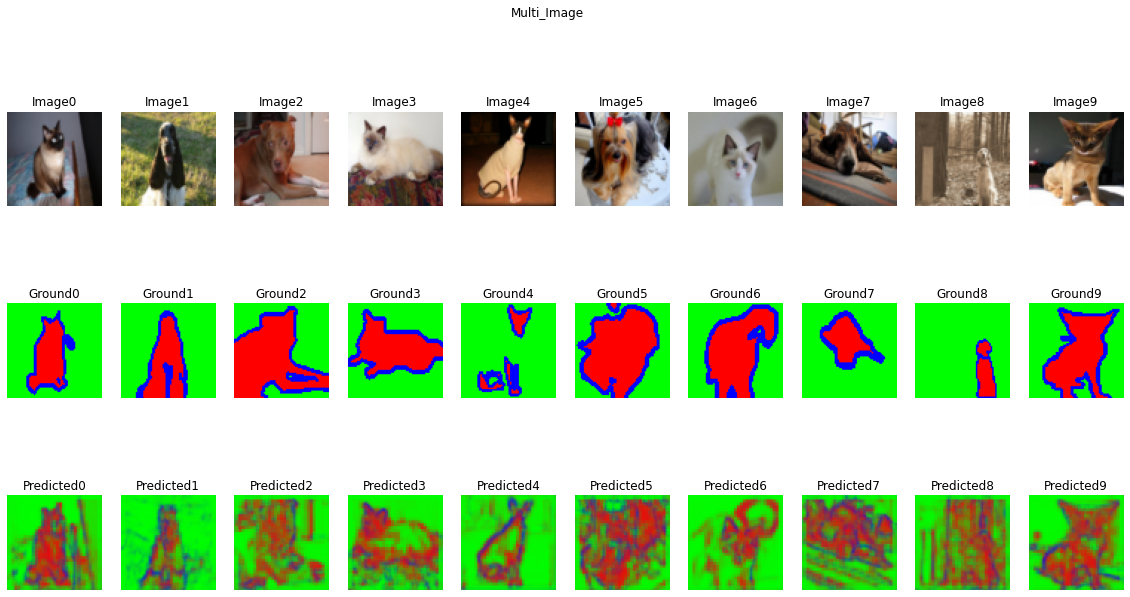

In [127]:
# Introducid vuestro código en esta celda y ejecutadlo.
X,y=testGenerator.__getitem__(2)
y_predcit=model2.predict(X)
plt.figure(figsize=(20,10)) # Establecer tamaño de ventana
plt.suptitle('Multi_Image') # Nombre de la imagen
for img in range(0,len(X)):
  plt.subplot(3,10,img+1), plt.title('Image'+str(img))
  plt.imshow(X[img]), plt.axis('off')
  plt.subplot(3,10,11+img), plt.title('Ground'+str(img))
  plt.imshow(y[img]), plt.axis('off')
  plt.subplot(3,10,21+img), plt.title('Predicted'+str(img))
  plt.imshow(y_predcit[img]), plt.axis('off')
plt.show()

**Responded aquí a la pregunta formulada**

In [128]:
# SE OBSERVA QUE ALCANZA A PREDECIR LOS CONTORNOS O BORDES EN LA FIGURA,
# ALGUNOS TIENEN PROBLEMAS DE RUIDO EN SU REPRESENTACION.
# ES APENAS ACEPTABLE LA PREDICCION.

### EJERCICIO 4: Modelos preentrenados.

En este ejercicio utilizareis arquitecturas más complejas de red neuronal ya preentrenadas y que han demostrado su efectividad para segmentar imágenes. En particular, utilizaréis el modelo UNET definido en la biblioteca segmentation-models. La documentación de esta biblioteca está disponible en:

https://segmentation-models.readthedocs.io/

Para empezar, deberéis instalar un conjunto de paquetes. Para hacerlo, ejecutad la siguiente celda.

In [129]:
!pip install segmentation-models
!pip install image-classifiers
!pip install efficientnet

Tras hacerlo deberéis ejecutar la siguiente línea con el fin de solucionar algunos problemas de compatibilidad. Notad que, incluso si trabajáis en local y los paquetes anteriores quedan instalados en vuestro ordenador, deberéis ejecutar esta línea siempre antes de trabajar con los modelos de segmentation-models.

In [130]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


Tras ejecutar las celdas anteriores, se os pide:

**4-a) (0.75 PUNTOS) Cread un modelo basado en la arquitectura UNET que pueda aceptar nuestras imágenes. Utilizad "resnet34" como backbone y los pesos del encoder provenientes del entrenamiento con "imagenet". Congelad el encoder del modelo para que, cuando se entrene la red, sólo se entrene el decodificador (decoder). Compilad el modelo utilizando "adam" como optimizador, "categorical_crossentropy" como función de pérdida y "categorical_accuracy", como mínimo, como métrica.**

In [131]:
# Introducid vuestro código en esta celda y ejecutadlo.
from segmentation_models import Unet
from segmentation_models.losses import CategoricalCELoss,CategoricalFocalLoss
from segmentation_models.metrics import FScore
from segmentation_models.utils import set_trainable

[X,y] = trainGenerator.__getitem__(0)
x=X[0]
N = x.shape[-1]
loss = CategoricalCELoss()
metric = FScore()
loss2 = CategoricalFocalLoss(alpha=0.1, gamma=1.0)
metric2 = "categorical_crossentropy"

model = Unet(backbone_name='resnet34', encoder_weights='imagenet',encoder_freeze=True,classes=3, activation='softmax')
model.compile('Adam', loss=loss2 , metrics=[metric ])

**4-b) (0.75 PUNTOS) Entrenad el modelo hasta que detectéis overfitting. Una vez detectado el punto donde empieza el overfitting, reentrenadlo de nuevo con el número adecuado de epochs.**

**Utilizad trainGenerator como conjunto de entrenamiento y valGenerator como conjunto de validación.**

**Notad que el entrenamiento, en este caso, puede tardar mucho tiempo. En Google Colaboratory podéis acelerar el entrenamiento cambiando el runtime a GPU.**

**Explicad claramente como habéis determinado el número adecuado de epochs.**

In [132]:
# Introducid vuestro código en esta celda y ejecutadlo.


# ---- Para Poder determinar cuando el modelo en su
# entrenamiento paso a un estado de overfitting se
#siguieron los pasos a continuacion:
#1. Una corrida de N =100 para observar el comportamiento
#2. Se compara el valor de las perdidas(loss y val_loss)
#	de tal manera que cuando loss que pertenece a test siga
#	disminuyendo y el val_loss se quede sin cambiar o empieza
#	a oscilar.
#3. Se detiene la iteracion debido que el modelo esta teniendo
#	overfitting y no generaliza lo que aprende para poder aplicarlo
#	en este caso a valGenerator set.

# Para mi caso se dio que en la iteracion 20 era suficiente para obtener
# la precision y el valor de loss adecuado.
N=20 
model.fit(x=trainGenerator,validation_data=valGenerator,epochs=N)

Epoch 1/20
516/516 [==============================] - 27s 44ms/step - loss: 0.0094 - f1-score: 0.5859 - val_loss: 0.0428 - val_f1-score: 0.3209
Epoch 2/20
516/516 [==============================] - 23s 44ms/step - loss: 0.0070 - f1-score: 0.6487 - val_loss: 0.0082 - val_f1-score: 0.6427
Epoch 3/20
516/516 [==============================] - 23s 44ms/step - loss: 0.0064 - f1-score: 0.6654 - val_loss: 0.0065 - val_f1-score: 0.6670
Epoch 4/20
516/516 [==============================] - 22s 43ms/step - loss: 0.0059 - f1-score: 0.6800 - val_loss: 0.0069 - val_f1-score: 0.6878
Epoch 5/20
516/516 [==============================] - 22s 44ms/step - loss: 0.0056 - f1-score: 0.6908 - val_loss: 0.0063 - val_f1-score: 0.6747
Epoch 6/20
516/516 [==============================] - 23s 44ms/step - loss: 0.0052 - f1-score: 0.7005 - val_loss: 0.0063 - val_f1-score: 0.6931
Epoch 7/20
516/516 [==============================] - 22s 42ms/step - loss: 0.0050 - f1-score: 0.7086 - val_loss: 0.0058 - val_f1-score:

**Responded aquí a la pregunta formulada**

**4-c) (0.5 PUNTOS) Evaluad el modelo con el conjunto definido por testGenerator. Según esta evaluación ¿el modelo se comporta mejor o peor que el modelo hecho desde cero del ejercicio anterior?**

In [133]:
# Introducid vuestro código en esta celda y ejecutadlo.
print(model.evaluate(testGenerator))
# utiliza el F1 Score que me brinda mejor vision sobre
# recall y accuracy , asi hacemos una metrica mas exhaustiva.

148/148 [==============================] - 4s 27ms/step - loss: 0.0063 - f1-score: 0.7384
[0.006263756658881903, 0.738354504108429]


In [134]:
## Fue claro que el modelo previamente entrenado con menos iteraciones
# y con menos modificaciones tuvo una mayor precision y rendimiento con el
# set de test.

**Responded aquí a la pregunta formulada**

**4-d) (0.5 PUNTOS) Seleccionad un lote (batch) del conjunto de test y segmentad sus imágenes con el modelo que acabáis de entrenar. Una vez segmentado, dibujad tres filas de imágenes. La primera fila debe contener las imágenes del lote. La segunda debe mostrar los ground truth correspondientes. La tercera debe contener los resultados de la segmentación.**

**Comentad los resultados obtenidos.**

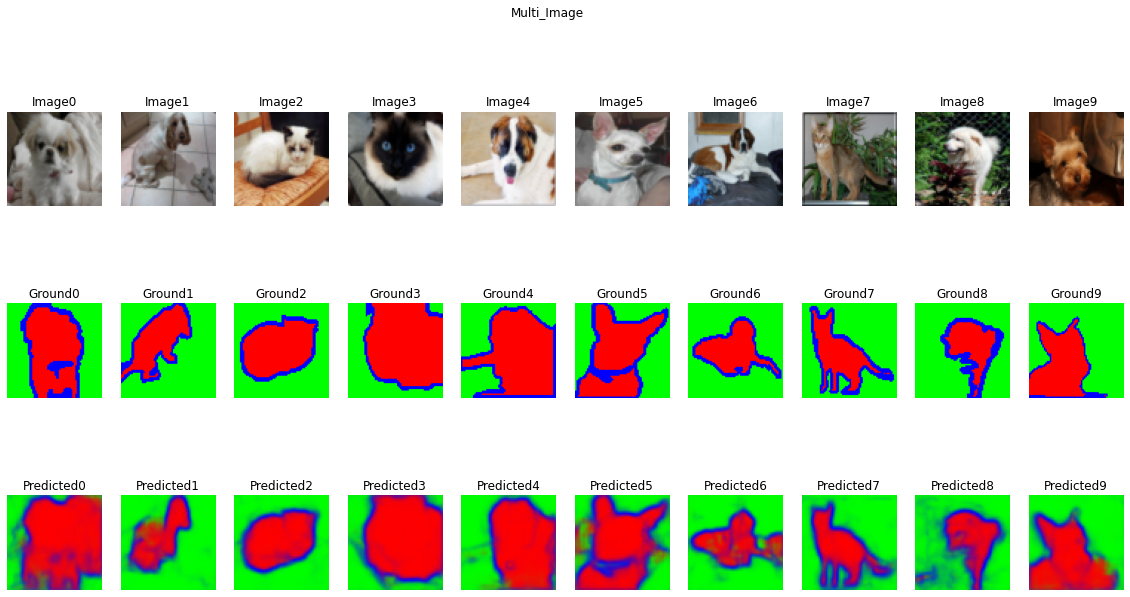

In [135]:
# Introducid vuestro código en esta celda y ejecutadlo.
X,y=testGenerator.__getitem__(10)
y_predcit=model.predict(X)
plt.figure(figsize=(20,10)) # Establecer tamaño de ventana
plt.suptitle('Multi_Image') # Nombre de la imagen
for img in range(0,len(X)):
  plt.subplot(3,10,img+1), plt.title('Image'+str(img))
  plt.imshow(X[img]), plt.axis('off')
  plt.subplot(3,10,11+img), plt.title('Ground'+str(img))
  plt.imshow(y[img]), plt.axis('off')
  plt.subplot(3,10,21+img), plt.title('Predicted'+str(img))
  plt.imshow(y_predcit[img]), plt.axis('off')
plt.show()

In [136]:
#COMENTARIO:
# Se observa claramente que su desempeno fue mucho mayor, a 
# Comparacion con el modelo mas 'custom' o  hecho a la medida
# donde calcular los bordes eran mas difusos en esta se obtuvo una
# mayor tasa de definicion en los relieves de cada figura.
# un mayor contraste entre los 3 bordes.

In [137]:
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_68 (ZeroPadding2 (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_68[0][0]          
____________________________________________________________________________________________

**Responded aquí a la pregunta formulada**

**4-e) (1.25 PUNTOS) Responded a las siguientes preguntas:**
* **¿Cuántos parámetros tiene el model?**
* **¿Qué es el backbone resnet34 que habéis utilizado?**
* **¿Qué ventaja tiene congelar el codificador (encoder) durante el entrenamiento?**
* **Si no se congelara el codificador, los pesos iniciales (imagenet en este caso) ¿tendrían alguna relevancia?**

**Responded aquí a las preguntas formuladas**

In [138]:
#Preguntas del 4-e

#1).el modelo tiene los siguientes params sacados de su sumary,
# Total params: 24,456,444
# Trainable params: 3,167,350
# Non-trainable params: 21,289,094

#2). Backbone resnet34 corresponde al nombre 
# del modelo de clasificacion, el cual se basa 
# en capas de extraccion de caracteristicas para
# la segmentcion de imagine, en otras palabras
# el modelo pre entrenado que se utilizara de tal
# forma que se le agregan mas layers para ajustarlo
# al data set de trabajo correspondiento.

#3). Congelar el encoder permite mantener los pesos 
# ya entrenados previamente del modelo resnet34,
# asi no se modifican las capas de exraccion solo las 
# capas densas de la salida

#4.) Si no se congelaran los pesos iniciales, el modelo podria 
# fallar en su extraccion , tambien tardaria mucho mas al
# tener que re entrenar las capas anteriores y perderiamos
# la ventaja de las capas que vienen ya en el modelo.

## CRITERIOS DE VALORACIÓN

Junto a cada apartado se ha indicado su puntuación.

Notad que todas las respuestas deben mostrarse en esta plantilla ipynb y que estas deben incluir código, el resultado de la ejecución del código y comentarios, además de las respuestas razonadas a todas las preguntas formuladas.

Es imprescindible que os ajustéis a las celdas destinadas a las respuestas dentro de esta plantilla, por lo que no debéis crear más celdas de las ya existentes. Recordad que el ipynb que entreguéis debe haber sido ejecutado por vosotros y, por lo tanto, debe mostrar los resultados de dicha ejecución.

## FORMATO Y FECHA DE ENTREGA

La práctica debe entregarse dentro del plazo indicado en el aula.

La solución debe consistir en un único archivo ipynb correspondiente a esta plantilla completada tal y como se especifica en el apartado "criterios de valoración".

Si tenéis alguna duda o necesitáis alguna aclaración, dirigíos al consultor responsable del aula.

## NOTA: PROPIETAT INTELECTUAL

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Es por tanto comprensible hacerlo en el marco de una práctica de los estudios del Máster de Ingeniería Informática, siempre que esto se documente claramente y no suponga plagio en la práctica.

Por lo tanto, al presentar una práctica que haga uso de recursos ajenos, se presentará junto con ella un documento en el que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y el su estatus legal: si la obra está protegida por copyright o se acoge a alguna otra licencia de uso (Creative Commons, licencia GNU, GPL ...). El estudiante deberá asegurarse de que la licencia que sea no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente deberá asumir que la obra está protegida por copyright.

Deberán, además, adjuntar los archivos originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.

Finalmente cabe destacar que cualqueir práctica que utilice recursos protegidos por copyright no podrá ser publicada, en ningún caso, en Mosaic, la revista del Grado en Multimedia de la UOC a no ser que los propietarios de los derechos intelectuales den su autorización explícita.

In [139]:
['https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras',
  'https://pythonprogramming.net/recurrent-neural-network-deep-learning-python-tensorflow-keras/',
 'https://claudiovz.github.io/scipy-lecture-notes-ES/intro/matplotlib/matplotlib.html#id8',
 'https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a'
 ]

['https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras',
 'https://pythonprogramming.net/recurrent-neural-network-deep-learning-python-tensorflow-keras/',
 'https://claudiovz.github.io/scipy-lecture-notes-ES/intro/matplotlib/matplotlib.html#id8',
 'https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a']